In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


# Μέρος Β: Kaggle Dataset
Σοφία Μπαρκάτσα(el18204), Μπενέτου Σμαραγδή(el18048), Μαργαρίτα Τσαρμποπούλου(el18848)

# Επισκόπηση

Gender: Φύλο επιβατών (Female, Male)

Customer Type: Ο τύπος πελάτη (Loyal customer, disloyal customer)

Age: Η πραγματική ηλικία των επιβατών

Type of Travel: Σκοπός της πτήσης των επιβατών (Personal Travel, Business Travel)

Class: Κατηγορία ταξιδιού στο αεροπλάνο των επιβατών (Business, Eco, Eco Plus)

Flight distance: Η απόσταση πτήσης αυτού του ταξιδιού

Inflight wifi service: Επίπεδο ικανοποίησης από την υπηρεσία Wi-Fi εν πτήσει (0:Not Applicable;1-5)

Departure/Arrival time convenient: Επίπεδο ικανοποίησης βολική ώρα αναχώρησης/άφιξης

Ease of Online booking: Επίπεδο ικανοποίησης από την online κράτηση

Gate location: Επίπεδο ικανοποίησης της τοποθεσίας πύλης

Food and drink: Επίπεδο ικανοποίησης από τρόφιμα και ποτά

Online boarding: Επίπεδο ικανοποίησης από την online επιβίβαση

Seat comfort: Επίπεδο ικανοποίησης από την άνεση του καθίσματος

Inflight entertainment: Επίπεδο ικανοποίησης από την ψυχαγωγία εν πτήσει

On-board service: Επίπεδο ικανοποίησης από την υπηρεσία εν πλω

Leg room service: Επίπεδο ικανοποίησης από την υπηρεσία δωματίου ποδιών

Baggage handling: Επίπεδο ικανοποίησης από το χειρισμό αποσκευών

Check-in service: Επίπεδο ικανοποίησης από την υπηρεσία check-in

Inflight service: Επίπεδο ικανοποίησης από την υπηρεσία εν πτήσει

Cleanliness: Επίπεδο ικανοποίησης καθαριότητας

Departure Delay in Minutes: Λεπτά καθυστέρηση κατά την αναχώρηση

Arrival Delay in Minutes: Λεπτά καθυστέρηση κατά την άφιξη

Satisfaction: Επίπεδο ικανοποίησης αεροπορικής εταιρείας (Satisfaction, neutral or dissatisfaction)

Ενώνουμε τα δεδομένα train και test για να μπορέσουμε να χρησιμοποιήσουμε cross validation

In [2]:
train_or = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
test_or = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
data = pd.concat([train_or,test_or], axis=0)
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Παρατηρούμε ότι κάποια δεδομένα δεν είναι σε μορφή int η float και ότι κάποια δεν έχουν τιμές

In [3]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [5]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0121034801355097


0.012% των δεδομένων απουσιάζουν

Επομένως σβήνουμε την στήλη id που δεν θα χρειαστούμε αλλά και την unnamed: 0 που περιέχει την αρίθμηση

In [6]:
data = data.drop(['id','Unnamed: 0'], axis=1)

Καθώς τα δεδομένα είναι στο πλήθος 129880 μας συμφέρει να σβήσουμε τα δεδομένα με κενές τιμές στο Arrival Delay in Minutes καθώς είναι αμελητέα στο πλήθος από το να αναπτύξουμε κάποια τεχνική συμπλήρωσης των τιμών.

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Παρατηρούμε ότι τα παρακάτω features έχουν για τιμές κατηγορίες. Όλα εκτός από το type of travel έχουν δυαδικές κατηγορίες οπότε μπορούν να μετατραπούν σε 0 ή 1. Το type of travel θα αποθηκευτεί σε μορφή 0,1, ή 2.

In [9]:
print(data['Gender'].unique())
print(data['satisfaction'].unique())
print(data['Class'].unique())
print(data['Type of Travel'].unique())
print(data['Customer Type'].unique())
features_cat = ['Gender', 'satisfaction', 'Type of Travel', 'Customer Type']

['Male' 'Female']
['neutral or dissatisfied' 'satisfied']
['Eco Plus' 'Business' 'Eco']
['Personal Travel' 'Business travel']
['Loyal Customer' 'disloyal Customer']


Μετατρέπουμε τα features 2 κατηγοριών σε 0,1

In [10]:
features_cat = pd.get_dummies(data[features_cat],
                              prefix_sep='#', drop_first=True)
features_cat

,Gender#Male,satisfaction#satisfied,Type of Travel#Personal Travel,Customer Type#disloyal Customer
0,1,0,1,0
1,1,0,0,1
2,0,1,0,0
3,0,0,0,0
4,1,1,0,0
...,...,...,...,...
25971,1,0,0,1
25972,1,1,0,0
25973,0,0,1,0
25974,1,1,0,0


Και την κατηγορία class σε 0,1,2

In [11]:
data['Class'] = pd.Categorical(data['Class'])
data.dtypes

Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [12]:
features_multi=data[['Class']]
features_multi

,Class
0,Eco Plus
1,Business
2,Business
3,Business
4,Business
...,...
25971,Business
25972,Business
25973,Eco
25974,Business


In [13]:
features_multi['Class']=features_multi['Class'].astype('category').cat.codes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
features_multi

,Class
0,2
1,0
2,0
3,0
4,0
...,...
25971,0
25972,0
25973,1
25974,0


Δημιουργούμε νέο dataframe με τα επεξεργασμένα δεδομένα

In [15]:
features_num = data.select_dtypes(include=['int64', 'float64'])
features_num

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [16]:
all_features = pd.concat([features_num, features_cat, features_multi], axis=1)
all_features.dtypes

Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender#Male                            uint8
satisfaction#satisfied                 uint8
Type of Travel#Personal Travel         uint8
Customer Type#disloyal Customer        uint8
Class     

Κάνουμε export με pickle

In [17]:
import pickle as pkl

X = all_features.loc[:, all_features.columns != 'satisfaction#satisfied']
y = all_features['satisfaction#satisfied']

data_pkl = {}
data_pkl['features'] = X
data_pkl['labels'] = y


with open( 'training.pkl', 'wb') as f:
    pkl.dump(data_pkl, f)

Παρατηρούμε ότι το πλήθος των δεδομένων που ανήκουν σε κάθε κατηγορία είναι διαφορετικό με την κλάση neutral/dissatisfied να έχει περισσότερα δεδομένα από την κλάση satisfied, ωστόσο, δεν ξεπερνάει ο λόγος τα 2/3 οπότε δεν θεωρούμε το dataset μη ισορροπημένο. 

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

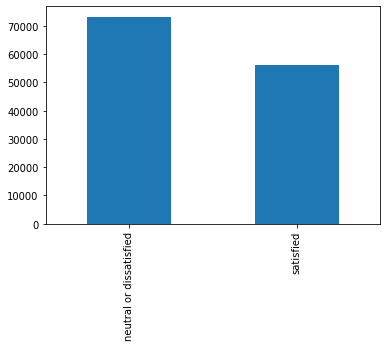

In [18]:
data['satisfaction'].value_counts().plot(kind='bar')
data['satisfaction'].value_counts()

# Μετρικές

Σαν μετρικές μπορούμε να χρησιμοποιήσουμε το accuracy αλλά και για την μικρή ανισορροπία του πλήθους των δεδομένων των δύο κλάσεων μπορούμε να λάβουμε υπόψη και το f1 score, precision και recall.

# Train-test split και σχήμα CV

Ορίζουμε το train set μας να έχει μέγεθος 70% των δειγμάτων ώστε να παρέχουμε αρκετά δεδομένα για εκπαίδευση αλλά και να έχουμε μια αρκετά ακριβή εικόνα από τα test. 

In [66]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=0)

Train data shape: (90640, 22)
Train labels: 90640
Test data shape: (38847, 22)
Test labels: 38847


<AxesSubplot:>

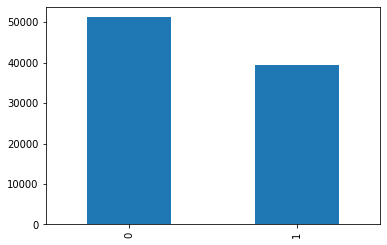

In [20]:
print("Train data shape:", X_train.shape)
print("Train labels:", y_train.shape[0])
print("Test data shape:", X_test.shape)
print("Test labels:", y_test.shape[0])
y_train.value_counts().plot(kind='bar')

Εξαιτίας του μεγάλου αριθμού δειγμάτων στην περίπτωση του SVM χρησιμοποιούμε stratified sampling για να κρατήσουμε ένα υποσύνολο του training set μας. (δοκιμάσαμε να τρέξουμε αρχικά για ολόκληρο το σετ τον SVM αλλά έκανε περίπου 20' να δώσει αποτέλεσμα)

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit
ratio = 0.2
N = int(len(y) * ratio)
sss = StratifiedShuffleSplit(n_splits = 1, test_size = int(0.3 * N), train_size = int(0.7 * N), random_state = 0)

np_features = np.array(X)
np_labels = np.array(y)
for train_index, test_index in sss.split(np_features, np_labels):
    X_train_svm, X_test_svm = np_features[train_index], np_features[test_index]
    y_train_svm, y_test_svm = np_labels[train_index], np_labels[test_index]

X_train, X_test, y_train, y_test = X_train_svm, X_test_svm, y_train_svm, y_test_svm

Train data shape: (18127, 22)
Train labels: 18127
Test data shape: (7769, 22)
Test labels: 7769


<AxesSubplot:xlabel='0'>

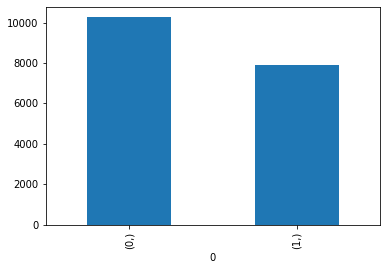

In [22]:
print("Train data shape:", X_train_svm.shape)
print("Train labels:", y_train_svm.shape[0])
print("Test data shape:", X_test_svm.shape)
print("Test labels:", y_test_svm.shape[0])
'''
X_train_svm = pd.DataFrame(X_train_svm)
y_train_svm = pd.DataFrame(y_train_svm)
X_test_svm = pd.DataFrame(X_test_svm)
y_test_svm = pd.DataFrame(y_test_svm)
'''
y_train_svm_dataframe = pd.DataFrame(y_train_svm)
y_train_svm_dataframe.value_counts().plot(kind='bar')

# Επίδοση out-of-the-box

In [23]:
classifiers_accuracy = {}
classifiers_f1 = {}
classifiers_precision = {}
classifiers_recall = {}

Εκπαιδεύουμε το μοντέλο MLP Classifier και σαν μια out-of-the-box εκτίμηση λαμβάνουμε 0.85 accuracy που είναι πολύ καλό.

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

model = MLPClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print("Number of predictions of 1: ", (preds == 1).sum())
print("Number of predictions of 0: ",(preds == 0).sum())

classifiers_accuracy['Multi-Layer Perceptron'] = accuracy_score(y_test, preds)
classifiers_f1['Multi-Layer Perceptron'] = f1_score(y_test, preds, average='macro')
classifiers_precision['Multi-Layer Perceptron'] = precision_score(y_test, preds, average='macro')
classifiers_recall['Multi-Layer Perceptron'] = recall_score(y_test, preds, average='macro')

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4393
           1       0.91      0.72      0.80      3376

    accuracy                           0.85      7769
   macro avg       0.86      0.83      0.84      7769
weighted avg       0.86      0.85      0.84      7769

Number of predictions of 1:  2688
Number of predictions of 0:  5081


In [25]:
from sklearn.svm import SVC
import time

start_time = time.time()
model = SVC()
model.fit(X_train_svm, y_train_svm)
preds = model.predict(X_test_svm)

print(classification_report(y_test_svm, preds))
print("Number of predictions of 1: ", (preds == 1).sum())
print("Number of predictions of 0: ",(preds== 0).sum())

classifiers_accuracy['Support Vector Machines'] = accuracy_score(y_test, preds)
classifiers_f1['Support Vector Machines'] = f1_score(y_test, preds, average='macro')
classifiers_precision['Support Vector Machines'] = precision_score(y_test, preds, average='macro')
classifiers_recall['Support Vector Machines'] = recall_score(y_test, preds, average='macro')

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      4393
           1       0.65      0.44      0.52      3376

    accuracy                           0.65      7769
   macro avg       0.65      0.63      0.63      7769
weighted avg       0.65      0.65      0.64      7769

Number of predictions of 1:  2253
Number of predictions of 0:  5516
Συνολικός χρόνος fit και predict: 28.160808086395264 seconds 



Παρατηρούμε ότι ο dummy classifier εχει 0.5 accuracy όπως περιμέναμε

In [26]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy="uniform")
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

classifiers_accuracy['Dummy Classifier'] = accuracy_score(y_test, preds)
classifiers_f1['Dummy Classifier'] = f1_score(y_test, preds, average='macro')
classifiers_precision['Dummy Classifier'] = precision_score(y_test, preds, average='macro')
classifiers_recall['Dummy Classifier'] = recall_score(y_test, preds, average='macro')

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      4393
           1       0.43      0.49      0.46      3376

    accuracy                           0.50      7769
   macro avg       0.50      0.50      0.49      7769
weighted avg       0.50      0.50      0.50      7769



**Πίνακας markdown**

In [27]:
scores = []
scores.append(list(classifiers_accuracy.values()))
scores.append(list(classifiers_f1.values()))
scores.append(list(classifiers_precision.values()))
scores.append(list(classifiers_recall.values()))

pd.DataFrame(scores, index = ["Accuracy Score","F1 Score","Precision Score","Recall Score"], columns = list(classifiers_accuracy.keys()))

,Multi-Layer Perceptron,Support Vector Machines,Dummy Classifier
Accuracy Score,0.847342,0.654138,0.496589
F1 Score,0.839617,0.625741,0.494288
Precision Score,0.861477,0.653774,0.496328
Recall Score,0.832886,0.628856,0.496264


**Bar plot σύγκρισης**

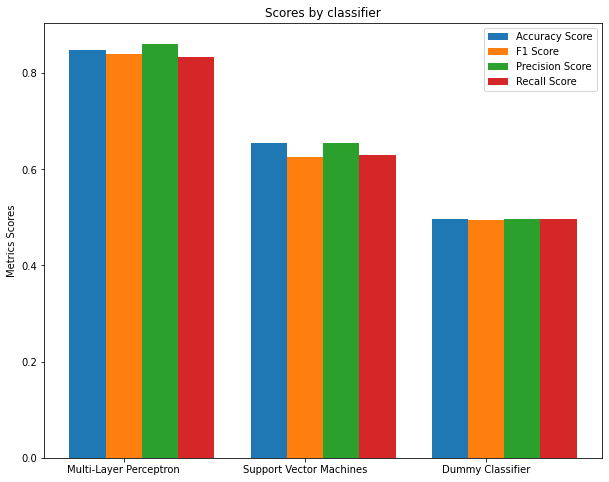

In [28]:
import matplotlib.pyplot as plt

x = [key for key in classifiers_accuracy.keys()]
y1 = [value for value in classifiers_accuracy.values()]
y2 = [value for value in classifiers_f1.values()]
y3 = [value for value in classifiers_precision.values()]
y4 = [value for value in classifiers_recall.values()]
X_axis = np.arange(len(x))

fig = plt.figure(figsize = (10, 8))
plt.bar(X_axis-0.2, y1, 0.2, label = 'Accuracy Score')
plt.bar(X_axis + 0, y2, 0.2, label = 'F1 Score')
plt.bar(X_axis + 0.2, y3, 0.2, label = 'Precision Score')
plt.bar(X_axis + 0.4, y4, 0.2, label = 'Recall Score')

plt.xticks(X_axis, x)
plt.title("Scores by classifier")
plt.ylabel("Metrics Scores")
plt.legend()
plt.show()

Σχολιασμος

# **Βελτιστοποίηση**

In [29]:
opt_classifiers_accuracy = {}
opt_classifiers_f1 = {}
opt_classifiers_precision = {}
opt_classifiers_recall = {}

# Βελτιστοποίηση MLP

Πειράζουμε τις υπερπαραμέτρους του εκτιμητή και συγκεκριμένα αλλάζουμε το hidden layer size και το μέγιστο αριθμό επαναλήψεων. Με αυτή την  αλλαγή βλέπουμε αύξηση του accuracy στα 0.90.

In [78]:
model = MLPClassifier( alpha=1e-5,
                    hidden_layer_sizes=(16,), random_state=1,max_iter=800)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4393
           1       0.94      0.84      0.88      3376

    accuracy                           0.90      7769
   macro avg       0.91      0.90      0.90      7769
weighted avg       0.91      0.90      0.90      7769



Δοκιμάζουμε περαιτέρω preprocessing των δεδομένων και συγκεκριμένα κανονικοποιούμε τα δεδομένα ώστε να έχουν μηδενικό μέσο όρο και μοναδιαία απόκλιση. Η κανονικοποίηση γίνεται με βάση το train set και εφαρμόζεται και στο test set. 

In [79]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Παρατηρούμε μεγάλη διαφορά στην accuracy των προβλέψεων. Συγκεκριμένα το μοντέλο έχει την ικανοποιητική accuracy με τιμή 0.93. Επίσης παρατηρούμε ότι το recall και το precision έχουν την ίδια τιμή και αρκετά ψηλή ίδια κατα +-0.01 με το accuracy οπότε συμπεραίνουμε ότι η διαφορά στο πλήθος δειγμάτων σε κάθε κλάση είναι αμελητέα και δεν επηρρέασε το αποτέλεσμα.

In [80]:
model = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(20,), random_state=1,max_iter=1000)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4393
           1       0.93      0.91      0.92      3376

    accuracy                           0.93      7769
   macro avg       0.93      0.93      0.93      7769
weighted avg       0.93      0.93      0.93      7769



Δοκιμάζουμε να αλλάξουμε και την παράμετρο του learning rate σε adaptive που σημαίνει ότι το learning rate μειώνεται όταν παρατηρείται σταθεροποίηση του training loss ώστε να επιτευχθεί ευκολότερα η σύγκλιση. Επίσης αρχικοποιούμε την τιμή του learning rate σε 0.01. Με αυτές τις δύο αλλαγές βελτιώνεται το accuracy στα 0.95.

In [81]:
model = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(20,), random_state=1,max_iter=500, learning_rate='adaptive', learning_rate_init=0.01)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4393
           1       0.95      0.93      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.94      0.95      7769
weighted avg       0.95      0.95      0.95      7769



Δοκιμάζουμε pipeline εισάγοντας επιπλέον στάδια προεπεξεργασίας όπως επιλογή χαρακτηριστικών με μεγάλη απόκλιση, τυχαία υπερδειγματοληψία για εξισορρόπηση κλάσεων και μείωση διαστάσεων των δεδομένων. Παρατηρούμε ότι επιτυγχάνουμε το ίδιο αποτέλεσμα με χρήση μόνο standard scaler, επομένως, παρακάτω δοκιμάζουμε να αφαιρέσουμε κάποια στάδια.

In [35]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(20,), random_state=1,max_iter=500, learning_rate='adaptive', learning_rate_init=0.01)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf)])

In [36]:
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4393
           1       0.95      0.94      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.95      0.95      7769
weighted avg       0.95      0.95      0.95      7769



Δοκιμάζουμε χωρίς τον sampler και βλέπουμε ίδια αποτελέσματα

In [37]:
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', clf)])
pipe1.fit(X_train,y_train)
preds = pipe1.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4393
           1       0.95      0.93      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.95      0.95      7769
weighted avg       0.95      0.95      0.95      7769



Δοκιμάζουμε χωρίς τον selector και χωρίς τον sampler 

In [38]:
pipe2 = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])
pipe2.fit(X_train,y_train)
preds = pipe2.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4393
           1       0.95      0.93      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.95      0.95      7769
weighted avg       0.95      0.95      0.95      7769



Και χωρις το pca. Καταλήγουμε ότι η αρχική αρχιτεκτονική αρκεί για να πετύχουμε καλά αποτελέσματα και συνεπώς χρησιμοποιούμε το pipe3.

In [39]:
pipe3 = Pipeline(steps=[('scaler', scaler), ('mlp', clf)])
pipe3.fit(X_train,y_train)
preds = pipe3.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4393
           1       0.95      0.93      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.94      0.95      7769
weighted avg       0.95      0.95      0.95      7769



Υπολογίζουμε την απόκλιση των τιμών κάθε χαρακτηριστικού για να έχουμε μια καλύτερη εκτίμηση πιθανών κατωφλιών απόκλισης στhν συνάρτηση variance threshold.

In [40]:
train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[2.28102970e+02 1.00027613e+06 1.76369931e+00 2.33808551e+00
 1.94907915e+00 1.62834604e+00 1.76709165e+00 1.85562266e+00
 1.74563441e+00 1.79239106e+00 1.66225382e+00 1.72843287e+00
 1.39748971e+00 1.58856029e+00 1.39470987e+00 1.72778600e+00
 1.41156669e+03 1.45073165e+03 2.49901943e-01 2.13091161e-01
 1.48731606e-01 3.87455129e-01]
1000276.1275278871


In [68]:
X_train.shape

(90640, 22)

Χρησιμοποιούμε την grid search cv για να εκτιμήσουμε τον καλύτερο συνδυασμό συνιστωσών PCA και μέγεθος hidden layer του mlp. Το cross-validation το κάνουμε με 3-fold.

In [92]:
from sklearn.model_selection import GridSearchCV
scaler = preprocessing.StandardScaler()

pca = PCA()
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(20,), random_state=1,max_iter=500, learning_rate='adaptive', learning_rate_init=0.01)
pipe = Pipeline(steps=[('scaler', scaler),  ('pca', pca), ('mlp', clf)])


#vthreshold = [1.3, 1.4, 1.5, 1.7] 
n_components = [10, 15, 22]
hidden_layer_sizes = [17, 15, 20]
estimator = GridSearchCV( pipe, dict( pca__n_components=n_components, mlp__hidden_layer_sizes=hidden_layer_sizes), cv=3, scoring='accuracy', n_jobs=-1)
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print(classification_report(y_test, preds))
print(estimator.best_estimator_)
print(estimator.best_params_)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4393
           1       0.95      0.93      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.95      0.95      7769
weighted avg       0.95      0.95      0.95      7769

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=22)),
                ('mlp',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=20,
                               learning_rate='adaptive',
                               learning_rate_init=0.01, max_iter=500,
                               random_state=1, solver='sgd'))])
{'mlp__hidden_layer_sizes': 20, 'pca__n_components': 22}


Βλέπουμε από το παραπάνω ότι παίρνουμε βέλτιστα αποτελέσματα για διαστάσεις χαρακτηριστικών 22 και μέγεθος hidden layer 20 όπως και είχαμε βρει με δοκιμές παραπάνω

In [93]:

scaler = preprocessing.StandardScaler()
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(20,), random_state=1,max_iter=500, learning_rate='adaptive', learning_rate_init=0.01)
pipe = Pipeline(steps=[ ('scaler', scaler),   ('mlp', clf)])

pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4393
           1       0.95      0.93      0.94      3376

    accuracy                           0.95      7769
   macro avg       0.95      0.94      0.95      7769
weighted avg       0.95      0.95      0.95      7769



In [94]:

opt_classifiers_accuracy['Multi-Layer Perceptron'] = accuracy_score(y_test, preds)
opt_classifiers_f1['Multi-Layer Perceptron'] = f1_score(y_test, preds, average='macro')
opt_classifiers_precision['Multi-Layer Perceptron'] = precision_score(y_test, preds, average='macro')
opt_classifiers_recall['Multi-Layer Perceptron'] = recall_score(y_test, preds, average='macro')

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Βελτιστοποίηση SVM

Με χρήση Optuna προσδιορίζουμε τις βέλτιστες υπερπαραμέτρους που αφορούν τον ίδιο τον ταξινομητή SVM.

Οι βέλτιστες τιμές υπερπαραμέτρων αναζητούνται με χρήση Optuna για 50 tasks.

Δοκιμάσαμε διάφορα pipelines για την βελτιστοποίηση των παραμέτρων με Optuna με διάφορες υπερπαραμέτρους για τον κάθε μετασχηματιστή και τον ταξινομητή και καταλήξαμε στο εξής:
* selector: Selector VarianceThreshold
* scaler: StandardScaler
* ros: RandomUnderSampling
* pca: PCA

In [ ]:
import time
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.under_sampling import RandomUnderSampler

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomUnderSampler()
pca = PCA()

In [ ]:
def objective(trial):
    vthreshold = trial.suggest_float('vthreshold', 0, 0.03, step=0.005) #υπερπαράμετροι για το variance thresholding
    n_components = trial.suggest_int('n_components', 2, 11, step=3) #υπερπαράμετροι για το principal component analysis
    #υπερπαράμετροι για τον SVM
    C = trial.suggest_float('C', 1e-10, 1) 
    kernel = trial.suggest_categorical('kernel',['linear','rbf', 'poly', 'sigmoid'])
    degree = trial.suggest_int('degree', 1, 50)
    tol = trial.suggest_float('tol', 1e-4, 1e-2)
    gamma = trial.suggest_float('gamma',0.001,10000)

    #αρχικοποίηση των transformers με υπερπαράμετρους optuna 
    selector= VarianceThreshold(threshold=vthreshold)
    scaler = StandardScaler()
    ros = RandomUnderSampler()
    pca = PCA(n_components=n_components)
    
    svc = SVC(C=C, kernel=kernel, degree=degree, tol=tol, gamma=gamma)
    
    pipe_svc = Pipeline(steps=[('selector', selector), ('scaler', scaler), 
                               ('sampler', ros), ('pca', pca), ('SVC', svc)])
     
    pipe_svc.fit(X_train_svm,y_train_svm)
    y_pred_test = pipe_svc.predict(X_test_svm)
    score = roc_auc_score(y_test_svm,y_pred_test)
    print("Test Score:",pipe_svc.score(X_test_svm,y_test_svm))
    print("Train Score:",pipe_svc.score(X_train_svm,y_train_svm), "\n")
    return score

In [ ]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print('Best Model Parameters:', study.best_params)

Δημιουργούμε το pipeline που προκύπτει από τις βέλτιστες υπερπαραμέτρους και εκπαιδεύουμε το βέλτιστο μοντέλο στο train dataset και αξιολογούμε τις επιδόσεις του στο test set.

In [ ]:
vthreshold = study.best_params['vthreshold']
n_components = study.best_params['n_components']

C = study.best_params['C']
kernel = study.best_params['kernel']
degree = study.best_params['degree']
gamma = study.best_params['gamma']
tol = study.best_params['tol']

svc = SVC(probability = True, C = C, kernel = kernel, degree = degree, gamma = gamma, tol = tol)

selector = VarianceThreshold(threshold=vthreshold)
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA(n_components=n_components)

bestSVM = Pipeline(steps=[('selector', selector),
                    ('scaler', scaler), 
                    ('sampler', ros), 
                    ('pca', pca), 
                    ('estimator', svc)], memory = 'tmp')

In [ ]:
bestSVM.fit(X_train_svm,y_train_svm)
preds = bestSVM.predict(X_test_svm)

print(classification_report(y_test_svm, preds))

opt_classifiers_accuracy['Support Vector Machines'] = accuracy_score(y_test_svm, preds)
opt_classifiers_f1['Support Vector Machines'] = f1_score(y_test, preds, average='macro')
opt_classifiers_precision['Support Vector Machines'] = precision_score(y_test, preds, average='macro')
opt_classifiers_recall['Support Vector Machines'] = recall_score(y_test, preds, average='macro')

# Τεκμηρίωση της διαδικασίας

**MLP** 

Αρχικά έγιναν δοκιμαστικά πειράματα με διαφορετικές τιμές τόσο σε στάδια προεπεξεργασίας όσο και σε υπερπαραμέτρους του ταξινομητή. Στη συνέχεια χρησιμοποιηθήκε το gridsearchcv με 3-fold cross validation σε αριθμό διαστάσεων του pca και σε μέγεθος του hidden layer. Βρέθηκε ότι με pca χειροτερεύουν οι αποδόσεις και ότι η βέλτιστη τιμή hidden layers είναι 20.

**SVM**

Η αναζήτηση έγινε πάνω ακόλουθες υπερπαραμέτρους που αφορούν τόσο την προεπεξεργασία, όσο και τον ίδιο τον ταξινομητή. Οι υπερπαράμετροι που αφορούν τον ταξινομητή ήταν:

* C: παράμετρος regularization για την αποφυγή φαινομένων overfitting
* kernel: πυρήνας του SVM αλγορίθμου
* degree: τάξη του πολυωνύμου στην περίπτωση του πολυωνυμικού πυρήνα
* tol: ανοχή στον τερματισμό του κριτηρίο σύγκλισης
* gamma: συντελεστής πυρήνα στις περιπτώσεις 'poly', 'rbf', 'sigmoid'

# Παρουσίαση αποτελεσμάτων

Παρακάτω φαίνονται τα αποτελέσματα των πειραμάτων για τους δύο ταξινομητές.

In [ ]:
scores = []
scores.append(list((classifiers_accuracy.values()))[:2])
scores.append(list(opt_classifiers_accuracy.values()))

scores.append(list((classifiers_f1.values()))[:2])
scores.append(list(opt_classifiers_f1.values()))

scores.append(list((classifiers_precision.values()))[:2])
scores.append(list(opt_classifiers_precision.values()))

scores.append(list((classifiers_recall.values()))[:2])
scores.append(list(opt_classifiers_recall.values()))

pd.DataFrame(scores, index = ["Out of the box Accuracy","Optimized Accuracy",
                              "Out of the box F1","Optimized F1",
                              "Out of the box Precision","Optimized Precision",
                              "Out of the box Recall","Optimized Recall"], columns = list(opt_classifiers_accuracy.keys()))

Στον παραπάνω πίνακα βλέπουμε τα αποτελέσματα που βγήκαν από τις μετρικές accuracy, f1-weighted, precision και recall για τους ταξινομητές MLP και SVM με και χωρίς βελτιστοποίηση.
Παρατηρούμε ότι και τα 2 μοντέλα έχουν καλύτερη επίδοση μετά την βελτιστοποίηση και είναι καλύτερα εκπαιδευμένα με βάση την μετρική accuracy καθώς πετυχαίνει το καλύτερο score, με πολύ μικρή όμως διαφορά από τις υπόλοιπες.

Παρατηρούμε πως το βελτιστοποιημένο μοντέλο με ταξινομητή το MLP, είναι συγκριτικά αυτό με την καλύτερη επίδοση και αυτό είναι που θα επιλέγαμε.

Παρακάτω παρατηρούμε γραφικά τα αποτελέσματα που περιγράψαμε συγκρίνοντας τις μετρικές μετά την βελτιστοποίηση όπως και κάθε μετρική χωρίς και με βελτιστοποίηση. 

In [ ]:
x = [key for key in opt_classifiers_accuracy.keys()]
y1 = [value for value in opt_classifiers_accuracy.values()]
y2 = [value for value in opt_classifiers_f1.values()]
y3 = [value for value in opt_classifiers_precision.values()]
y4 = [value for value in opt_classifiers_recall.values()]
X_axis = np.arange(len(x))

fig = plt.figure(figsize = (10, 8))
plt.bar(X_axis-0.2, y1, 0.2, label = 'Optimized Accuracy Score')
plt.bar(X_axis + 0, y2, 0.2, label = 'Optimized F1 Score')
plt.bar(X_axis + 0.2, y3, 0.2, label = 'Optimized Precision Score')
plt.bar(X_axis + 0.4, y4, 0.2, label = 'Optimized Recall Score')

plt.xticks(X_axis, x)
plt.title("Scores by classifier")
plt.ylabel("Metrics Scores")
plt.legend()
plt.show()

In [ ]:
x = [key for key in opt_classifiers_accuracy.keys()]
y1 = list(classifiers_accuracy.values())[:2]
y2 = [value for value in opt_classifiers_accuracy.values()]
X_axis = np.arange(len(x))

fig = plt.figure(figsize = (10, 8))
plt.bar(X_axis - 0.1, y1, 0.2, label = 'Out of the box Accuracy')
plt.bar(X_axis + 0.1, y2, 0.2, label = 'Optimized Accuracy')

plt.xticks(X_axis, x)
plt.title('Accuracy by classifier')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

x = [key for key in opt_classifiers_f1.keys()]
y1 = list(classifiers_f1.values())[:2]
y2 = [value for value in opt_classifiers_f1.values()]
X_axis = np.arange(len(x))

fig = plt.figure(figsize = (10, 8))
plt.bar(X_axis - 0.1, y1, 0.2, label = 'Out of the box F1')
plt.bar(X_axis + 0.1, y2, 0.2, label = 'Optimized F1')

plt.xticks(X_axis, x)
plt.title('F1 by classifier')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

x = [key for key in opt_classifiers_precision.keys()]
y1 = list(classifiers_precision.values())[:2]
y2 = [value for value in opt_classifiers_precision.values()]
X_axis = np.arange(len(x))

fig = plt.figure(figsize = (10, 8))
plt.bar(X_axis - 0.1, y1, 0.2, label = 'Out of the box Precision')
plt.bar(X_axis + 0.1, y2, 0.2, label = 'Optimized Precision')

plt.xticks(X_axis, x)
plt.title('Precision by classifier')
plt.ylabel('Precision Scores')
plt.legend()
plt.show()

x = [key for key in opt_classifiers_recall.keys()]
y1 = list(classifiers_recall.values())[:2]
y2 = [value for value in opt_classifiers_recall.values()]
X_axis = np.arange(len(x))

fig = plt.figure(figsize = (10, 8))
plt.bar(X_axis - 0.1, y1, 0.2, label = 'Out of the box Recall')
plt.bar(X_axis + 0.1, y2, 0.2, label = 'Optimized Recall')

plt.xticks(X_axis, x)
plt.title('Recall by classifier')
plt.ylabel('Recall Scores')
plt.legend()
plt.show()

# Συμπεράσματα

Για το συγκεκριμένο dataset φαίνεται ότι η βέλτιστη επιλογή είναι ο ταξινομητής **Multi Layer Perceptron** αφού δίνει σταθερά καλύτερα αποτελέσματα σε όλες τις μετρικές που χρησιμοποιήθηκαν, με καλύτερη την accuracy. Επίσης υπερτερεί σημαντικά στο χρόνο εκπαίδευσης διότι μπορεί να διαχειριστεί ολόκληρο το dataset σε μικρό συνολικά χρόνο ενώ ο SVM αδυνατούσε να το διαχειριστεί και χρειάστηκε να γίνει εκπαίδευση σε ένα sample του dataset. Από τις διάφορες δοκιμές που έγιναν δεν βρέθηκε κανένα κριτήριο σύμφωνα με το οποίο ο SVM να έχει καλύτερη επίδοση από τον MLP.